##### Having some package issues below with running this locally via Anaconda.  Since I'm now able to run statsmodels (i.e., SARIMAX) in 
##### GCP I'm not going to take the time to figure this out.

In [32]:
# use print only as a function
from __future__ import print_function
import sys
sys.version_info
pd.show_versions()  # Shows Python 3.5 and StatsModels .8


INSTALLED VERSIONS
------------------
commit: None
python: 3.5.2.final.0
python-bits: 64
OS: Darwin
OS-release: 15.6.0
machine: x86_64
processor: i386
byteorder: little
LC_ALL: None
LANG: en_US.UTF-8

pandas: 0.18.1
nose: 1.3.7
pip: 8.1.2
setuptools: 27.2.0
Cython: 0.24.1
numpy: 1.11.1
scipy: 0.18.1
statsmodels: 0.8.0.dev0+42d2f57
xarray: None
IPython: 5.1.0
sphinx: 1.4.6
patsy: 0.4.1
dateutil: 2.5.3
pytz: 2016.6.1
blosc: None
bottleneck: 1.1.0
tables: 3.2.3.1
numexpr: 2.6.1
matplotlib: 1.5.3
openpyxl: 2.3.2
xlrd: 1.0.0
xlwt: 1.1.2
xlsxwriter: 0.9.3
lxml: 3.6.4
bs4: 4.5.1
html5lib: None
httplib2: 0.9.2
apiclient: 1.5.5
sqlalchemy: 1.0.13
pymysql: None
psycopg2: None
jinja2: 2.8
boto: 2.42.0
pandas_datareader: None


/Users/swe03/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [5]:
__author__ = 'swe03'

import argparse

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.pyplot as pplt
from decimal import *

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from statsmodels.graphics.api import qqplot

from scipy import stats

desired_width = 400
pd.set_option('display.width',desired_width)

In [8]:
!pip install seaborn

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [31]:
import datetime
#import scipy.linalg as la
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
import statsmodels.tsa as tsa
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

AttributeError: module 'scipy' has no attribute 'linalg'

In [12]:
#!pip install pandasql
from pandasql import PandaSQL 
pdsql = PandaSQL()

##### Read the BQ tables created in the Dst Addr and Port profile 1 or Iterate and Create ADS's 1 programs

In [13]:
#!pip install google-api-python-client
p53_ts = pd.read_gbq("select * from prod.ts_port_53_4wks", project_id="network-sec-analytics")
#p53_ts

Requesting query... ok.
Query running...
Query done.
Processed: 31.5 kb

Retrieving results...
Got 672 rows.

Total time taken 1.15 s.
Finished at 2017-05-05 12:24:52.


In [14]:
p53_ts=p53_ts.sort_values(['date_hour'],ascending=True)
p53_ts

,date_hour,dst_port,count,max,bytes_mean,min
228,2016-11-20 00:00:00,53,55,576,143.29,61
57,2016-11-20 01:00:00,53,51,722,154.22,63
433,2016-11-20 02:00:00,53,59,408,146.71,66
310,2016-11-20 03:00:00,53,55,576,135.29,63
428,2016-11-20 04:00:00,53,59,432,130.32,67
171,2016-11-20 05:00:00,53,51,576,141.29,63
342,2016-11-20 06:00:00,53,58,552,145.21,67
75,2016-11-20 07:00:00,53,55,558,145.96,60
397,2016-11-20 08:00:00,53,57,516,155.09,65
201,2016-11-20 09:00:00,53,52,408,135.52,67


In [15]:
# Create an Hour only variable for the Seasonal Dummies variable creation
p53_ts['hour'] = p53_ts.date_hour.dt.strftime('%H')  # Get the Hour

In [16]:
# Create a Weekday variable for the Seasonal Dummies variable creation
p53_ts['weekday'] = p53_ts.date_hour.dt.strftime('%w')  # Get Weekday

In [17]:
p53_ts

,date_hour,dst_port,count,max,bytes_mean,min,hour,weekday
228,2016-11-20 00:00:00,53,55,576,143.29,61,00,0
57,2016-11-20 01:00:00,53,51,722,154.22,63,01,0
433,2016-11-20 02:00:00,53,59,408,146.71,66,02,0
310,2016-11-20 03:00:00,53,55,576,135.29,63,03,0
428,2016-11-20 04:00:00,53,59,432,130.32,67,04,0
171,2016-11-20 05:00:00,53,51,576,141.29,63,05,0
342,2016-11-20 06:00:00,53,58,552,145.21,67,06,0
75,2016-11-20 07:00:00,53,55,558,145.96,60,07,0
397,2016-11-20 08:00:00,53,57,516,155.09,65,08,0
201,2016-11-20 09:00:00,53,52,408,135.52,67,09,0


In [18]:
def hour_seasonal_creation(): 
    for index, row in p53_ts.iterrows():
        row_hour = int(row['hour'])
        for i in range(0, 23):
            if row_hour == i:
                p53_ts.loc[index, 'hvar'+ str(i)] = 1
            else:
                p53_ts.loc[index, 'hvar'+ str(i)] = 0
#hour_seasonal_creation()

In [19]:
# Started the week on a Sunday (0)
def weekday_seasonal_creation(): 
    for index, row in p53_ts.iterrows():
        row_weekday = int(row['weekday'])
        for i in range(0, 7):
            if row_weekday == i:
                p53_ts.loc[index, 'wdvar'+ str(i)] = 1
            else:
                p53_ts.loc[index, 'wdvar'+ str(i)] = 0
                
weekday_seasonal_creation()

In [20]:
# This may not be necessary and was only done for the ARMA process
#p53_ts2 = p53_ts.reset_index(drop=True)

In [21]:
p53_ts=p53_ts.reset_index(drop=True)

In [22]:
#p53_ts

In [23]:
# Need a new Feature created since we repurpose date_hour as Index below
p53_ts['Date_Hour'] = p53_ts['date_hour']
#p53_ts

In [24]:
#Need an Index for the Seasonal Decompostion below
p53_ts.reset_index(inplace=True)
p53_ts = p53_ts.set_index('date_hour')
p53_ts.index.dtype      # Note in the output:dtype('<M8[ns]') but...  np.dtype('datetime64[ns]') = np.dtype('<M8[ns]'):

dtype('<M8[ns]')

##### Execute some Univariate Statistics

In [25]:
p53_ts['bytes_mean'].describe()

count     672.000000
mean      152.840908
std       224.403124
min       105.840000
25%       130.797500
50%       139.000000
75%       147.482500
max      5624.690000
Name: bytes_mean, dtype: float64

In [26]:
#p53_ts['hvar0'].loc[p53_ts['hvar0']== 1].describe()

In [27]:
# Remove the Outliers
p53_ts[p53_ts['bytes_mean'] >1000] = 150
p53_ts[p53_ts['count'] > 75] = 50
p53_ts[p53_ts['count'] < 35] = 50
p53_ts['count'].describe()

count    672.000000
mean      49.200893
std        6.356038
min       35.000000
25%       45.000000
50%       50.000000
75%       53.000000
max       66.000000
Name: count, dtype: float64

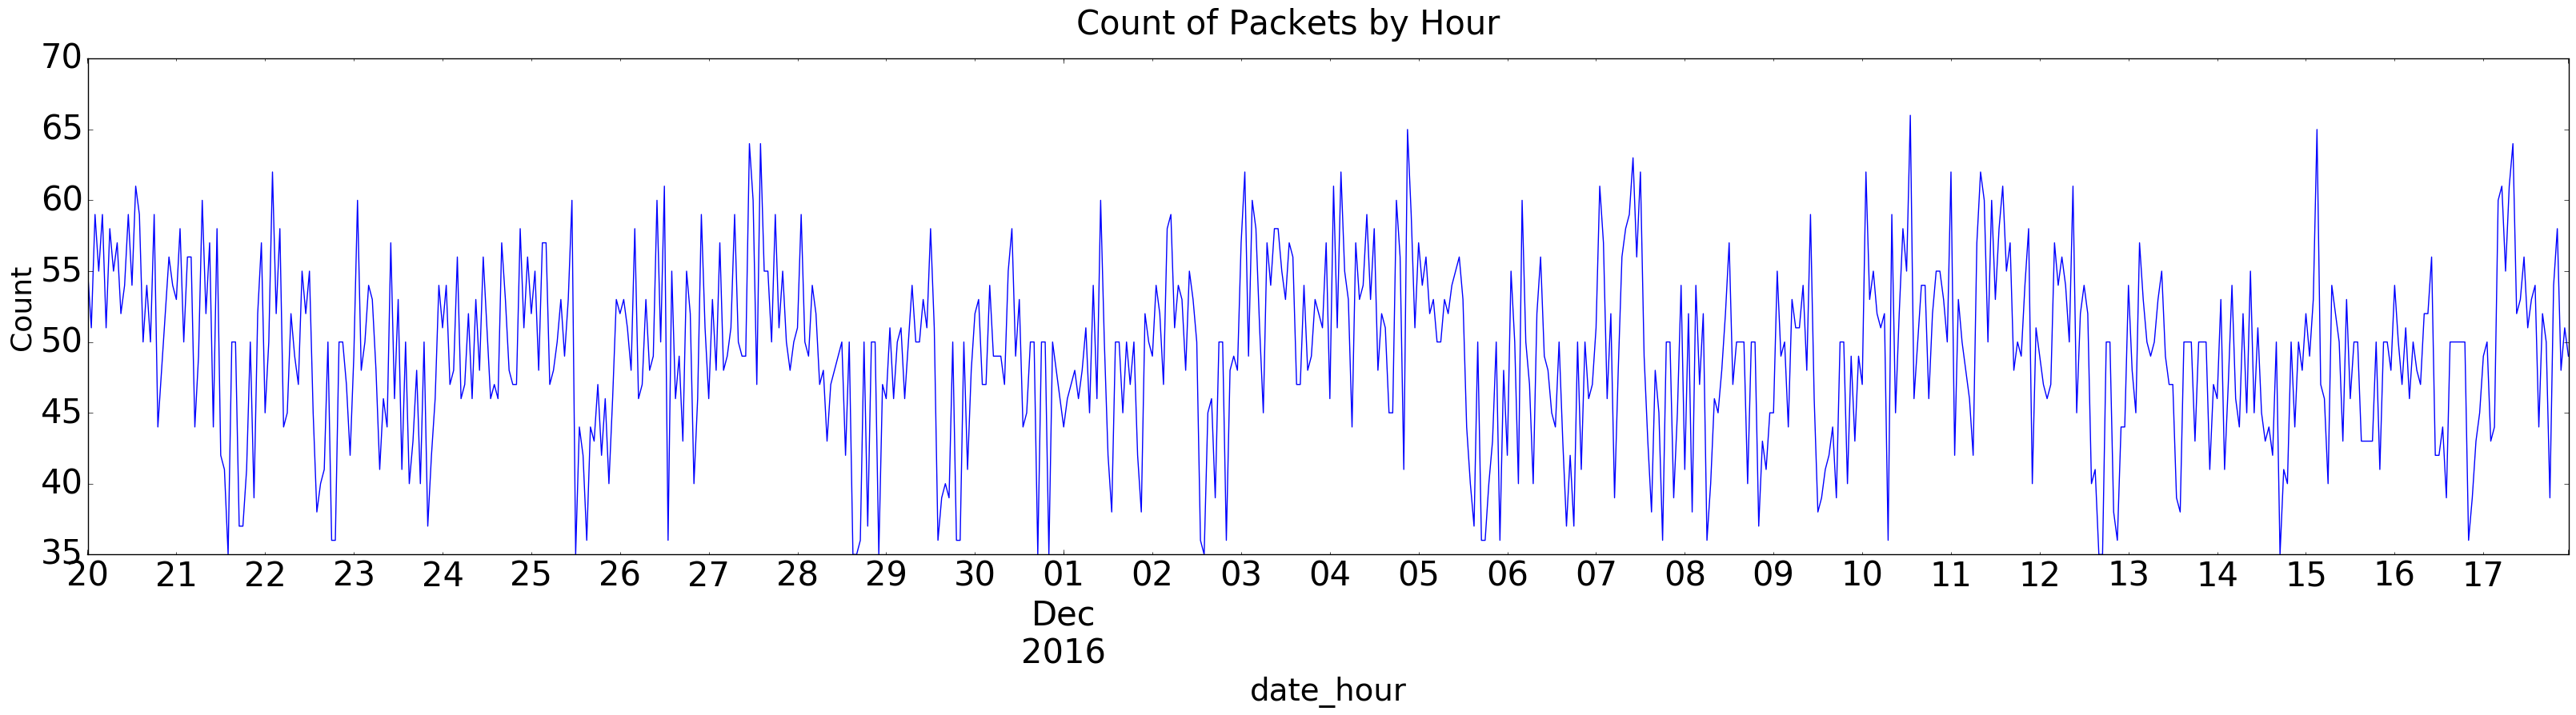

In [28]:
# This plots all of the variables
#p53_ts.plot(figsize=(12,8), title= 'Mean Packet Size in Bytes', fontsize=14)

#p53_ts.bytes_mean.plot(figsize=(12,8), title= 'Mean Packet Size in Bytes', fontsize=14)

fig = plt.figure()
fig.suptitle('Count of Packets by Hour', fontsize=30)
plt.xlabel('', fontsize=28)   # The fontsize here is applied to the df variable name not the label in the function
plt.ylabel('Count', fontsize=26)
p53_ts['count'].plot(figsize=(40,8), fontsize=30)
#plt.savefig('Packet_Count.png', bbox_inches='tight')

In [29]:
decomposition = seasonal_decompose(p53_ts['count'].values,freq=24)  
  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

NameError: name 'seasonal_decompose' is not defined

NameError: name 'sm' is not defined

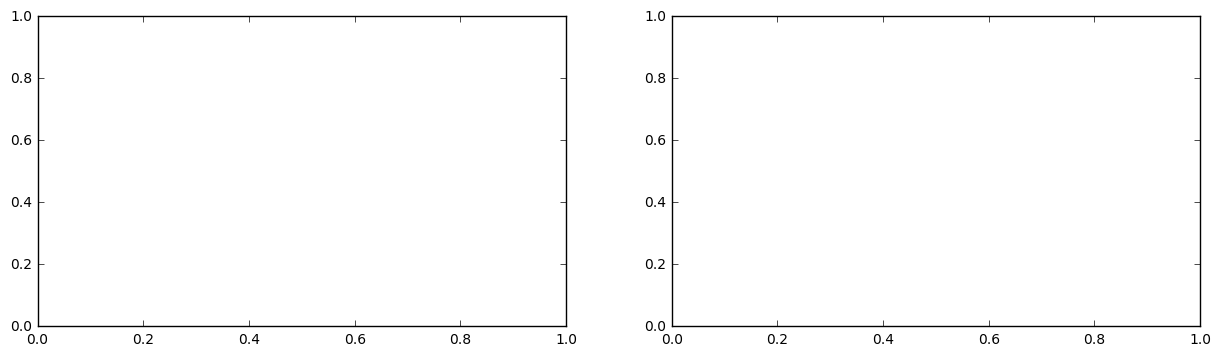

In [30]:
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf(p53_ts['count'], lags=24, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(p53_ts['count'], lags=24, ax=axes[1])

In [24]:
##exog = np.column_stack(list_of_lists)
a = np.array(p53_ts['wdvar0'])  # This is Sunday
b = np.array(p53_ts['wdvar1'])
c = np.array(p53_ts['wdvar2'])
d = np.array(p53_ts['wdvar3'])
e = np.array(p53_ts['wdvar4'])
f = np.array(p53_ts['wdvar5'])
g = np.array(p53_ts['wdvar6'])  # Saturday.  This is the Reference day (i.e., Intercept) for Exog 2
exog1 = np.column_stack((a,b,c,d,e,f,g))
exog2 = np.column_stack((a,b,c,d,e,f))  # This is for the initial modeling using the exog parameter  

# This set is for the subsequent one step ahead predictions for day of week dummies. In this case, 2 days.
d0 = np.array([0,1])                  # Need (2,6).  This is Row, Column
d1 = np.array([0,0])
d2 = np.array([0,0])                         
d3 = np.array([0,0])
d4 = np.array([0,0])
d5 = np.array([0,0])   
exog3 = np.column_stack((d0,d1,d2,d3,d4,d5))                    


#bytes_mean exog congif.  
# Need N Rows(Nbr of one step ahead Hours), 1 Col
exog4 = np.empty((2,1)) 
exog4[0] = 122.25
exog4[1] = 125.50
exog4


array([[ 122.25],
       [ 125.5 ]])

If time_varying_reg is True then mle_reg must be False (see SARIMAX notes) 
exog=p53_ts['bytes_mean'], time_varying_regression=False, mle_regression=True)
mod.fit(trend=c)  This is the constant (i.e., intercept)  but so is...
SARIMAX(..... trend='c'). This puts the intercept in the table below and changes the coeff's but not the forecast.
It appears that the add_constant function enables you to calculate an intercept as part of the dynamic regressors
 in the exog regressor set.
168 Hours in a Week.  672(4 Wks) - 168(1 Wk) = 504 Hours(i.e., 3 Weeks for Model Fit). 168 is the Holdout Sample
Needed to add the "enforce_" parameters since incrementing the AR parm to 4 was causing error messages
These some additional parameters when subsetting with the index
  (p53_ts['count'].ix[0:672], enforce_stationarity=False,enforce_invertibility=False,

,enforce_stationarity=False,enforce_invertibility=False
,exog=(p53_ts['bytes_mean']))    
,exog=(exog2)
    
mod = sm.tsa.statespace.SARIMAX(p53_ts['count'],trend='n',order=(2,0,5),seasonal_order=(3,0,0,24)

In [25]:
p53_ts

,index,dst_port,count,max,bytes_mean,min,hour,weekday,wdvar0,wdvar1,wdvar2,wdvar3,wdvar4,wdvar5,wdvar6,Date_Hour
date_hour,,,,,,,,,,,,,,,,
2016-11-20 00:00:00,0,53,55,576,143.29,61,00,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-11-20 00:00:00.000000000
2016-11-20 01:00:00,1,53,51,722,154.22,63,01,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-11-20 01:00:00.000000000
2016-11-20 02:00:00,2,53,59,408,146.71,66,02,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-11-20 02:00:00.000000000
2016-11-20 03:00:00,3,53,55,576,135.29,63,03,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-11-20 03:00:00.000000000
2016-11-20 04:00:00,4,53,59,432,130.32,67,04,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-11-20 04:00:00.000000000
2016-11-20 05:00:00,5,53,51,576,141.29,63,05,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-11-20 05:00:00.000000000
2016-11-20 06:00:00,6,53,58,552,145.21,67,06,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-11-20 06:00:00.000000000
2016-11-20 07:00:00,7,53,55,558,145.96,60,07,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-11-20 07:00:00.000000000
2016-11-20 08:00:00,8,53,57,516,155.09,65,08,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-11-20 08:00:00.000000000


In [26]:
mod = sm.tsa.statespace.SARIMAX(p53_ts['count'], 
     trend='n', order=(5,0,1), seasonal_order=(6,0,0,24))
results = mod.fit()
print(results.summary())                                

/Users/swe03/anaconda/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/Users/swe03/anaconda/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              count   No. Observations:                  672
Model:             SARIMAX(5, 0, 1)x(6, 0, 0, 24)   Log Likelihood               -2127.399
Date:                            Tue, 28 Mar 2017   AIC                           4280.797
Time:                                    10:10:00   BIC                           4339.431
Sample:                                11-20-2016   HQIC                          4303.505
                                     - 12-17-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1116      0.043     25.669      0.000       1.027       1.196
ar.L2         -0.0011      0.058   

In [28]:
# This is just a SARIMAX Results Wrapper.  It collects the model parameters for later use.
res = mod.filter(results.params)

In [29]:
#predict_res = res.predict(alpha=0.05, start=0, end=10, dynamic=5)
predict_res = res.predict()
predict_res

2016-11-20 00:00:00     0.000000
2016-11-20 01:00:00    51.914078
2016-11-20 02:00:00    51.459789
2016-11-20 03:00:00    53.933392
2016-11-20 04:00:00    54.191743
2016-11-20 05:00:00    55.301922
2016-11-20 06:00:00    54.580019
2016-11-20 07:00:00    54.919277
2016-11-20 08:00:00    54.839539
2016-11-20 09:00:00    55.006858
2016-11-20 10:00:00    54.652617
2016-11-20 11:00:00    54.227907
2016-11-20 12:00:00    55.005937
2016-11-20 13:00:00    54.723257
2016-11-20 14:00:00    56.079936
2016-11-20 15:00:00    56.701718
2016-11-20 16:00:00    55.344112
2016-11-20 17:00:00    55.049035
2016-11-20 18:00:00    53.607480
2016-11-20 19:00:00    54.193217
2016-11-20 20:00:00    52.797603
2016-11-20 21:00:00    51.889560
2016-11-20 22:00:00    51.972444
2016-11-20 23:00:00    52.307764
2016-11-21 00:00:00    53.428738
2016-11-21 01:00:00    53.269587
2016-11-21 02:00:00    55.152123
2016-11-21 03:00:00    53.679585
2016-11-21 04:00:00    54.533278
2016-11-21 05:00:00    53.726377
          

In [30]:
# In-sample one-step-ahead predictions
predict = res.get_prediction()
predict_ci = predict.conf_int()
predict.predicted_mean

2016-11-20 00:00:00     0.000000
2016-11-20 01:00:00    51.914078
2016-11-20 02:00:00    51.459789
2016-11-20 03:00:00    53.933392
2016-11-20 04:00:00    54.191743
2016-11-20 05:00:00    55.301922
2016-11-20 06:00:00    54.580019
2016-11-20 07:00:00    54.919277
2016-11-20 08:00:00    54.839539
2016-11-20 09:00:00    55.006858
2016-11-20 10:00:00    54.652617
2016-11-20 11:00:00    54.227907
2016-11-20 12:00:00    55.005937
2016-11-20 13:00:00    54.723257
2016-11-20 14:00:00    56.079936
2016-11-20 15:00:00    56.701718
2016-11-20 16:00:00    55.344112
2016-11-20 17:00:00    55.049035
2016-11-20 18:00:00    53.607480
2016-11-20 19:00:00    54.193217
2016-11-20 20:00:00    52.797603
2016-11-20 21:00:00    51.889560
2016-11-20 22:00:00    51.972444
2016-11-20 23:00:00    52.307764
2016-11-21 00:00:00    53.428738
2016-11-21 01:00:00    53.269587
2016-11-21 02:00:00    55.152123
2016-11-21 03:00:00    53.679585
2016-11-21 04:00:00    54.533278
2016-11-21 05:00:00    53.726377
          

In [31]:
# Dynamic predictions
predict_dy = res.get_prediction()    # start= , end= , dynamic= 
predict_dy_ci = predict_dy.conf_int()

In [32]:
predict_dy

In [33]:
predict_dy.predicted_mean.ix[:]  


2016-11-20 00:00:00     0.000000
2016-11-20 01:00:00    51.914078
2016-11-20 02:00:00    51.459789
2016-11-20 03:00:00    53.933392
2016-11-20 04:00:00    54.191743
2016-11-20 05:00:00    55.301922
2016-11-20 06:00:00    54.580019
2016-11-20 07:00:00    54.919277
2016-11-20 08:00:00    54.839539
2016-11-20 09:00:00    55.006858
2016-11-20 10:00:00    54.652617
2016-11-20 11:00:00    54.227907
2016-11-20 12:00:00    55.005937
2016-11-20 13:00:00    54.723257
2016-11-20 14:00:00    56.079936
2016-11-20 15:00:00    56.701718
2016-11-20 16:00:00    55.344112
2016-11-20 17:00:00    55.049035
2016-11-20 18:00:00    53.607480
2016-11-20 19:00:00    54.193217
2016-11-20 20:00:00    52.797603
2016-11-20 21:00:00    51.889560
2016-11-20 22:00:00    51.972444
2016-11-20 23:00:00    52.307764
2016-11-21 00:00:00    53.428738
2016-11-21 01:00:00    53.269587
2016-11-21 02:00:00    55.152123
2016-11-21 03:00:00    53.679585
2016-11-21 04:00:00    54.533278
2016-11-21 05:00:00    53.726377
          

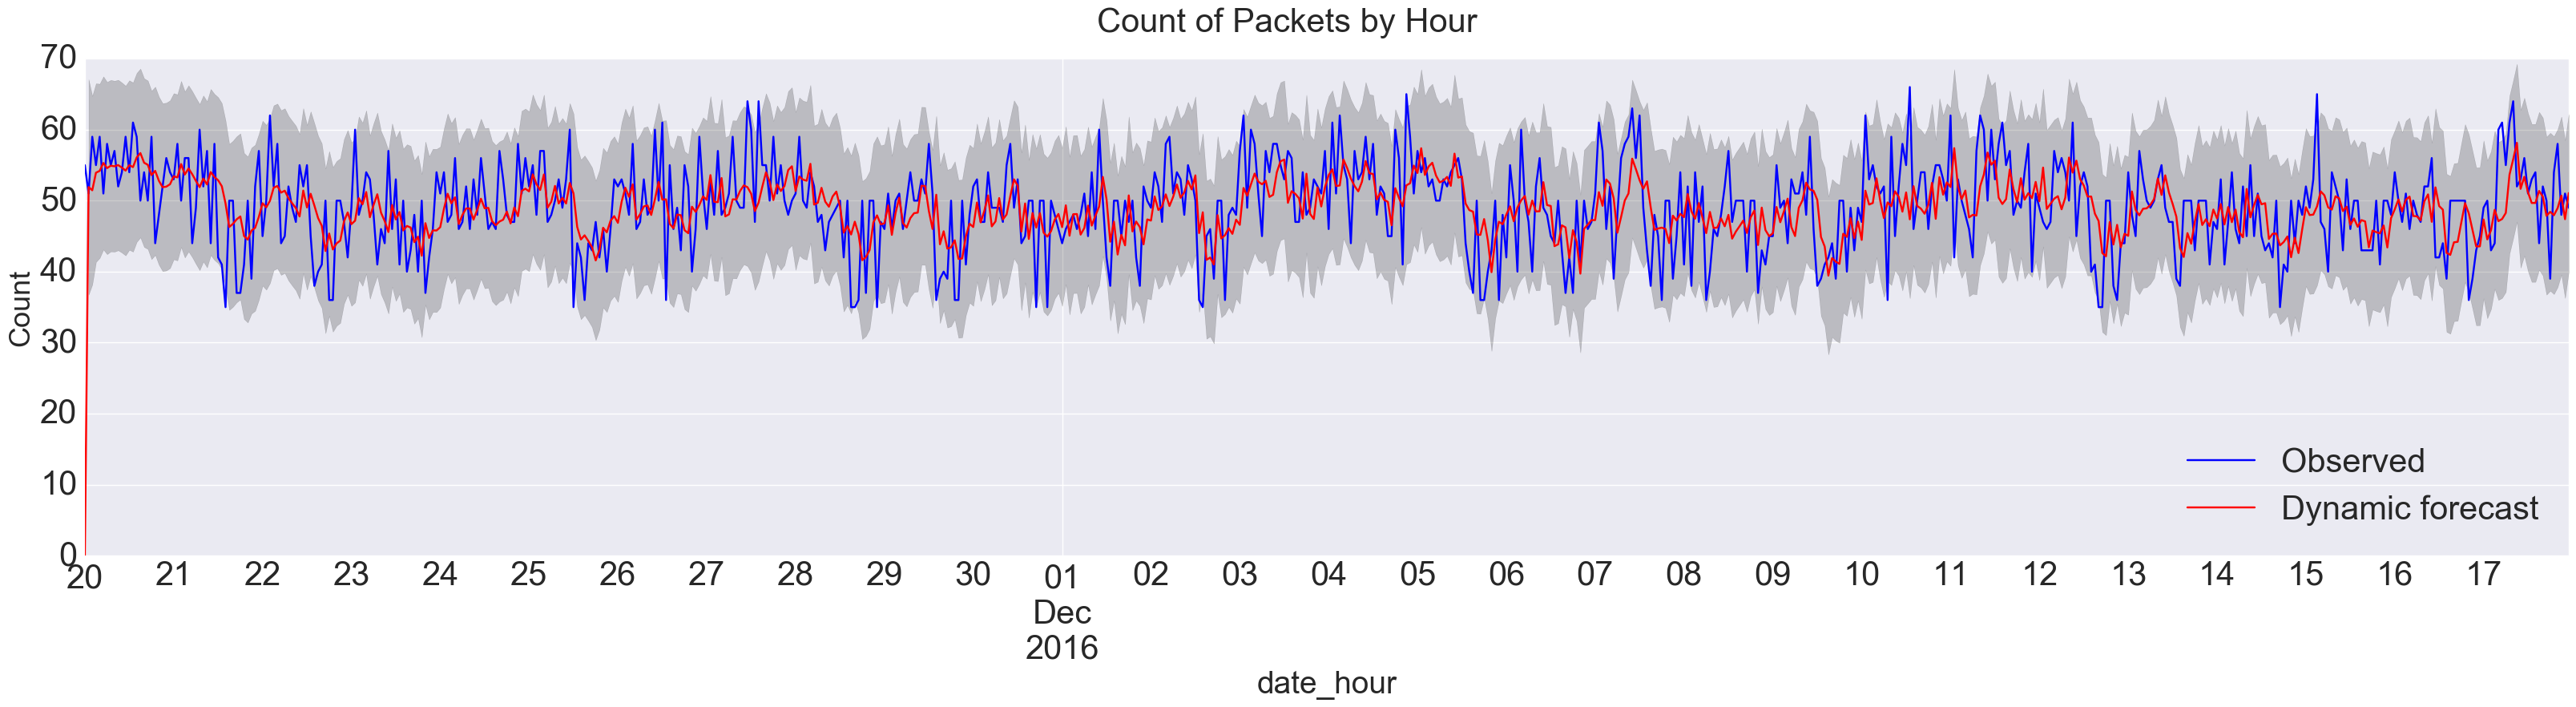

In [34]:
## This is all controlled with the code block above:
# Dynamic predictions
#predict_dy = res.get_prediction()

# Graph
fig, ax = plt.subplots(figsize=(40,8))
npre = 4
#ax.set(title='Count of Packets by Hour', xlabel='Hour', ylabel='Count')
fig.suptitle('Count of Packets by Hour', fontsize=30)
plt.xlabel('', fontsize=28)   # The fontsize here is applied to the df variable name not the label in the function
plt.ylabel('Count', fontsize=26)

# Plot data points
p53_ts.ix[:,'count'].plot(ax=ax, style='blue', label='Observed')  # 650 is '12.17.2016 02:00:00'

# Plot predictions
predict_dy.predicted_mean.ix[:].plot(ax=ax, style='r', label='Dynamic forecast', fontsize=30)
ci = predict_dy_ci.ix[1:]
ax.fill_between(ci.index, ci.ix[:,0], ci.ix[:,1], color='black', alpha=0.2)

legend = ax.legend(loc='lower right', fontsize=30)

In [35]:
predict_dy_ci.ix[:]

,lower count,upper count
2016-11-20 00:00:00,-45.938660,45.938660
2016-11-20 01:00:00,36.742681,67.085474
2016-11-20 02:00:00,38.184175,64.735403
2016-11-20 03:00:00,41.357139,66.509644
2016-11-20 04:00:00,41.927096,66.456390
2016-11-20 05:00:00,43.115848,67.487997
2016-11-20 06:00:00,42.455475,66.704563
2016-11-20 07:00:00,42.843996,66.994558
2016-11-20 08:00:00,42.804409,66.874670
2016-11-20 09:00:00,43.004940,67.008777


In [36]:
# Already getting this in the model output above
print(results.aic, results.bic, results.hqic)

4280.79728247 4339.43064089 4303.50514008


In [37]:
sm.stats.durbin_watson(results.resid.values)

1.8833242256228953

In [38]:
 resid1 = results.resid

In [39]:
#If the p-val is very small, it means it is unlikely that the data came from a normal distribution
stats.normaltest(resid1)

NormaltestResult(statistic=192.48583809418847, pvalue=1.5930570745927678e-42)

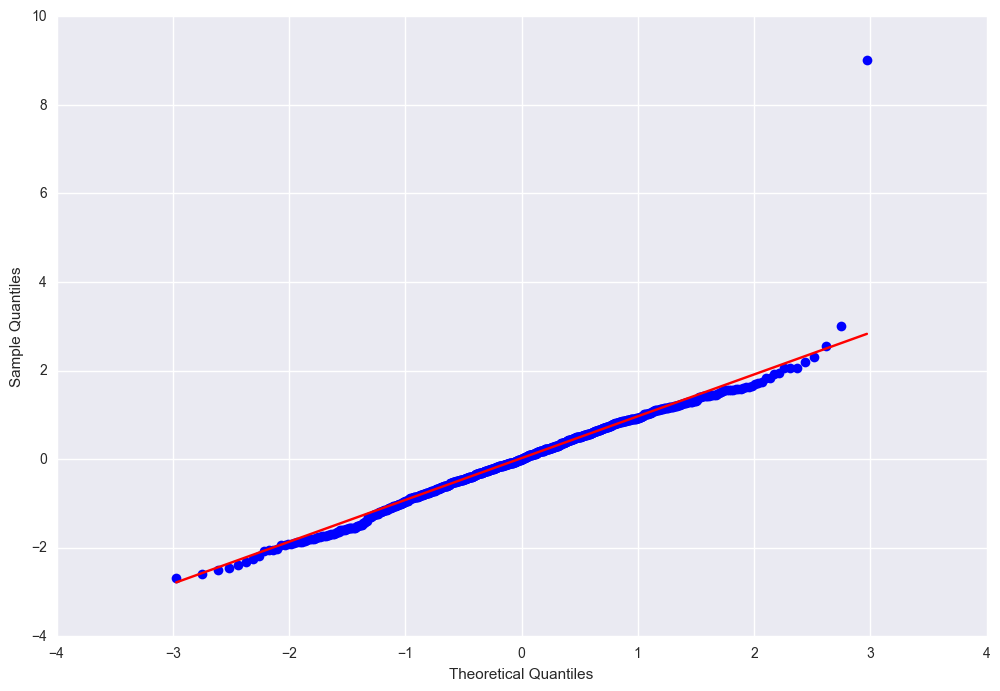

In [40]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid1, line='q', ax=ax, fit=True)

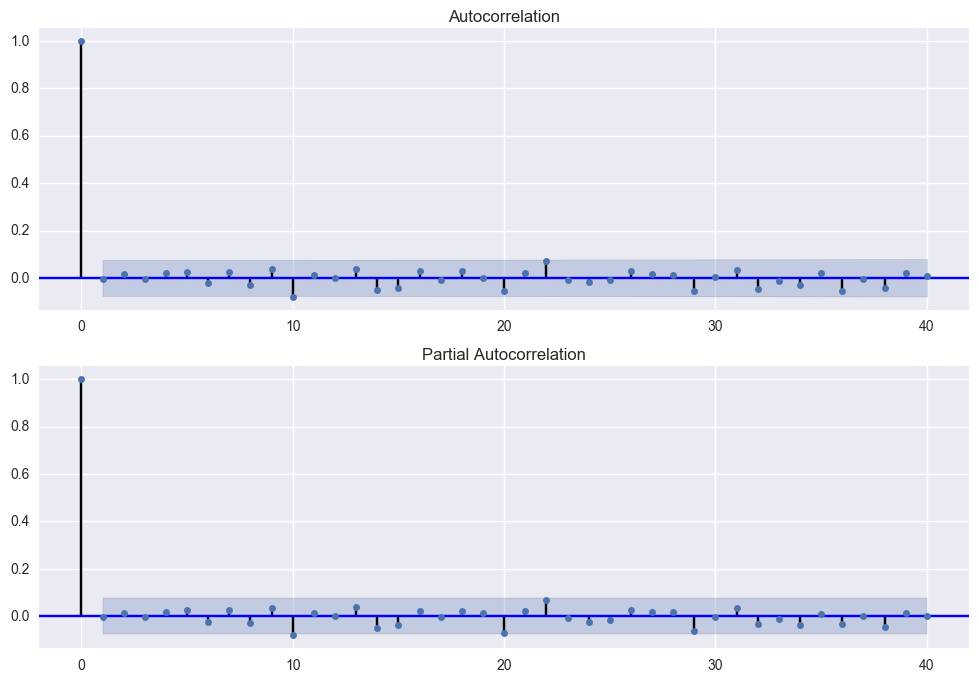

In [41]:
# Graph the acf and pacf for the Residuals
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid1.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid1, lags=40, ax=ax2)

In [42]:
# Box-Pierce Q statistic tests the Null Ho that *ALL* correlations up to Lag K are equal to Zero.  This is not the 
# same as the correlogram above.
r,q,p = sm.tsa.acf(resid1.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0  -0.004793   0.015509  0.900890
2.0   0.014651   0.160624  0.922828
3.0  -0.003993   0.171417  0.982066
4.0   0.019568   0.431036  0.979858
5.0   0.025444   0.870653  0.972310
6.0  -0.023819   1.256501  0.974002
7.0   0.025816   1.710422  0.974120
8.0  -0.028957   2.282396  0.971107
9.0   0.037309   3.233301  0.954323
10.0 -0.082058   7.840266  0.644436
11.0  0.013917   7.972973  0.715723
12.0 -0.001367   7.974255  0.787139
13.0  0.036238   8.876825  0.782181
14.0 -0.049899  10.590757  0.717844
15.0 -0.041231  11.762728  0.696893
16.0  0.029351  12.357530  0.719023
17.0 -0.010880  12.439381  0.772832
18.0  0.029917  13.059222  0.788043
19.0  0.001415  13.060612  0.835454
20.0 -0.056681  15.292385  0.759440
21.0  0.018620  15.533611  0.795257
22.0  0.070795  19.025976  0.643724
23.0 -0.009307  19.086422  0.696197
24.0 -0.018716  19.331267  0.734100
25.0 -0.009973  19.400892  0.777504
26.0  0.027392  19.926952  0

In [43]:
# NOTE:  No params, as the model doc specifies, are given
# If using exogenous variable day of week then the shape must be (2,6) where 2 is the nbr of day to forecast
predict_sarimax = results.predict(start=672, end=673)  #,exog=exog4)    # ,exog = exog3, exog=(p53_ts['bytes_mean'])
print(predict_sarimax)

2016-12-18 00:00:00    51.418903
2016-12-18 01:00:00    50.939035
Freq: H, dtype: float64


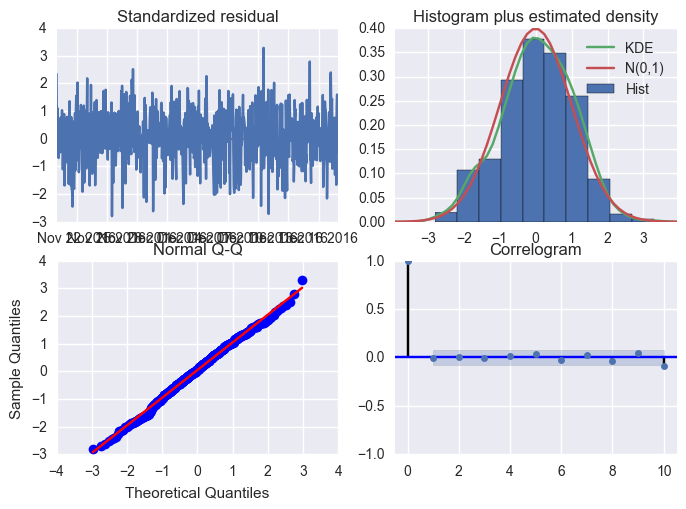

In [44]:
fig = results.plot_diagnostics()

In [45]:
# In-sample one-step-ahead predictions
# NOTE:  start is 672 but since this is a 0 based index the last history record is 671 for 672 total records and 
#        the start value is actually the first forecasted record and index value.
predict = results.get_prediction(start=672, end=683)
           #,exog = exog4  ) # Bytes_Mean for two Hours
           #exog = exog2    # Day of Week  
predict_ci = predict.conf_int()

In [46]:
predict.predicted_mean

2016-12-18 00:00:00    51.418903
2016-12-18 01:00:00    50.939035
2016-12-18 02:00:00    48.444902
2016-12-18 03:00:00    51.575543
2016-12-18 04:00:00    52.737653
2016-12-18 05:00:00    50.744480
2016-12-18 06:00:00    49.626714
2016-12-18 07:00:00    52.317481
2016-12-18 08:00:00    50.855824
2016-12-18 09:00:00    53.632769
2016-12-18 10:00:00    48.669452
2016-12-18 11:00:00    50.934197
Freq: H, dtype: float64

In [47]:
predict_ci.sort_index(ascending=True)

,lower count,upper count
2016-12-18 00:00:00,40.303764,62.534043
2016-12-18 01:00:00,39.674788,62.203282
2016-12-18 02:00:00,37.001298,59.888507
2016-12-18 03:00:00,39.926787,63.224299
2016-12-18 04:00:00,40.895066,64.580240
2016-12-18 05:00:00,38.817703,62.671256
2016-12-18 06:00:00,37.622619,61.630809
2016-12-18 07:00:00,40.245173,64.389789
2016-12-18 08:00:00,38.725348,62.986300
2016-12-18 09:00:00,41.452305,65.813234


In [48]:
#ci.ix[:,0]  # This is a series. It is the "lower count" text cell
#ci.ix[:,1]   # This is a series.  It is the "upper count" text cell
#ci.ix[:]      # This displays both display cells "lower count"|"upper count"


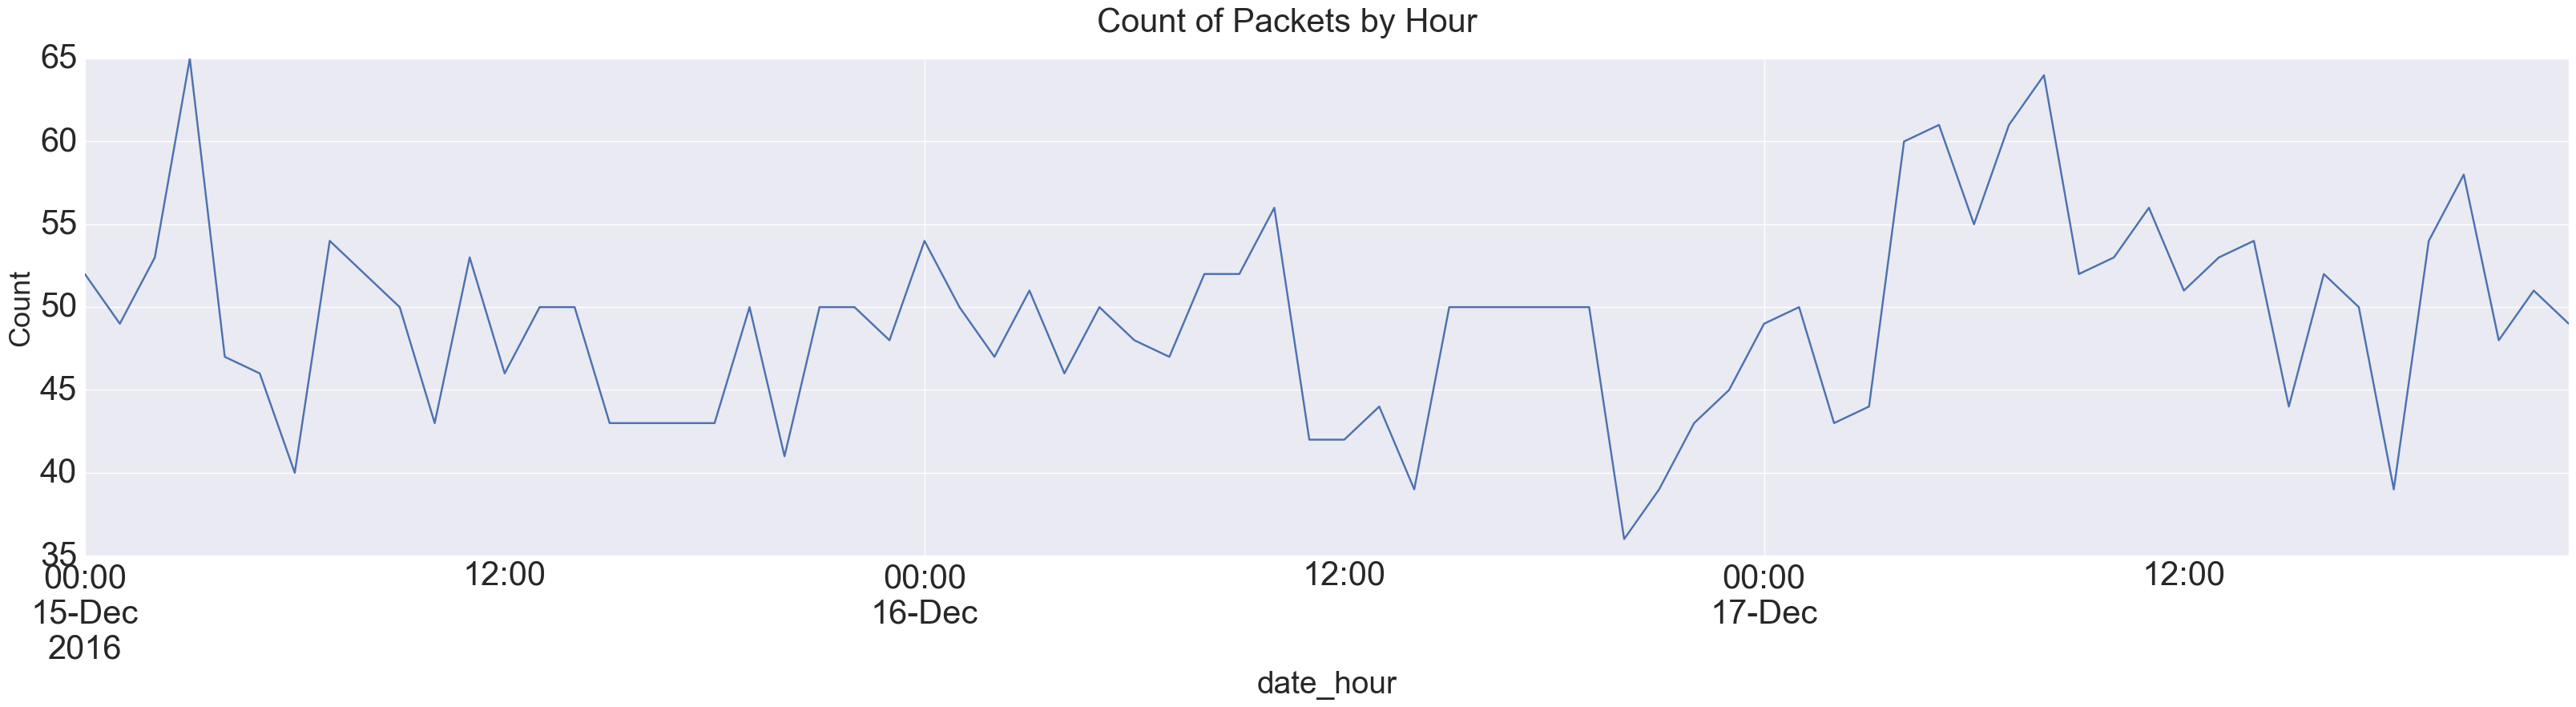

In [49]:
## Graph
fig, ax = plt.subplots(figsize=(9,4))  ## Changing these settings didn't seem to do anything other then change the color
#npre = 4   

fig.suptitle('Count of Packets by Hour', fontsize=30)
plt.xlabel('Hour', fontsize=28)   # The fontsize here is applied to the variable name not the label in the function
plt.ylabel('Count', fontsize=26)

#ax.set(title='Count of Packets by Hour', xlabel='Hour', ylabel='Count')

# This will just put the circles on the first 10 data points
#p53_ts.ix[0:10, 'count'].plot(ax=ax,  label='Observed', style='o')      # style='o',   This puts the blue circles at the data points

# figsize(x-axis length, y-axis length)
# fontsize is just for the axes size
p53_ts['count'].ix[600:].plot(figsize=(40,8), fontsize=30)  

In [1]:
# Plot predictions
# These are the two predicted Count values with the date/time (2016-12-18 00:00:00    51.207925)
# It is the same as [0:2] start at 0 and stop at 1
#predict.predicted_mean.ix[:].plot(ax=ax,  label='One-step-ahead forecast')  ## This is redundant with below

ci = predict_ci.ix[:]  # ci is the display labels and values for the Upper and Lower bounds 

fig, ax = plt.subplots(figsize=(40, 8))
plt.xlabel('date/hour',fontsize=30)
plt.ylabel('count',fontsize=30)
ax = p53_ts['count'].ix[623:].plot(ax=ax)   

# :,0 - Lower :,1 - Upper values by hour
# alpha is transparency value.  Higher is less transparent
ax.fill_between(ci.index, ci.ix[:,0], ci.ix[:,1], color='r', alpha=0.40)  

predict.predicted_mean.ix[:].plot(ax=ax, style='g', label='One Step Ahead forecast (12 Hours)', fontsize=40)
#ci = predict_ci.ix[:]
#ax.fill_between(ci.index, ci.ix[:,0], ci.ix[:,1], color='g', alpha=0.1)  # This displays the "Upper Count" "Lower Count"

legend = ax.legend(loc='lower right',fontsize=35)

NameError: name 'predict_ci' is not defined

In [51]:
ci.index

DatetimeIndex(['2016-12-18 00:00:00', '2016-12-18 01:00:00', '2016-12-18 02:00:00', '2016-12-18 03:00:00', '2016-12-18 04:00:00', '2016-12-18 05:00:00', '2016-12-18 06:00:00', '2016-12-18 07:00:00', '2016-12-18 08:00:00', '2016-12-18 09:00:00', '2016-12-18 10:00:00', '2016-12-18 11:00:00'], dtype='datetime64[ns]', freq='H')

In [52]:
ci.info

<bound method DataFrame.info of                      lower count  upper count
2016-12-18 00:00:00    40.303764    62.534043
2016-12-18 01:00:00    39.674788    62.203282
2016-12-18 02:00:00    37.001298    59.888507
2016-12-18 03:00:00    39.926787    63.224299
2016-12-18 04:00:00    40.895066    64.580240
2016-12-18 05:00:00    38.817703    62.671256
2016-12-18 06:00:00    37.622619    61.630809
2016-12-18 07:00:00    40.245173    64.389789
2016-12-18 08:00:00    38.725348    62.986300
2016-12-18 09:00:00    41.452305    65.813234
2016-12-18 10:00:00    36.442175    60.896729
2016-12-18 11:00:00    38.662882    63.205511>

In [53]:
ci.ix[:,0]

2016-12-18 00:00:00    40.303764
2016-12-18 01:00:00    39.674788
2016-12-18 02:00:00    37.001298
2016-12-18 03:00:00    39.926787
2016-12-18 04:00:00    40.895066
2016-12-18 05:00:00    38.817703
2016-12-18 06:00:00    37.622619
2016-12-18 07:00:00    40.245173
2016-12-18 08:00:00    38.725348
2016-12-18 09:00:00    41.452305
2016-12-18 10:00:00    36.442175
2016-12-18 11:00:00    38.662882
Freq: H, Name: lower count, dtype: float64

In [54]:
ci.ix[:,1]

2016-12-18 00:00:00    62.534043
2016-12-18 01:00:00    62.203282
2016-12-18 02:00:00    59.888507
2016-12-18 03:00:00    63.224299
2016-12-18 04:00:00    64.580240
2016-12-18 05:00:00    62.671256
2016-12-18 06:00:00    61.630809
2016-12-18 07:00:00    64.389789
2016-12-18 08:00:00    62.986300
2016-12-18 09:00:00    65.813234
2016-12-18 10:00:00    60.896729
2016-12-18 11:00:00    63.205511
Freq: H, Name: upper count, dtype: float64

In [55]:
ci.ix[1,1]

62.203281689271741